# Working with Data APIs

**Adapted from: Sam Maurer // maurer@berkeley.edu // Oct. 3, 2016**

This notebook provides a demonstration of data-access APIs that operate over the web. See README.md for setup instructions.

In Part 1, we'll load and parse results from an API feed of earthquake data.  
In Part 2, we'll add query parameters to the workflow, using the Google Maps Geolocation API as an example.  
In Part 3, we'll use an authenticated API to query public Twitter posts. 

# Part 1: Reading from an automated data feed

### USGS real-time earthquake feeds

This is an API for near-real-time data about earthquakes. Data is provided in JSON format over the web. No authentication is needed, and there's no way to customize the output. Instead, the API has a separate endpoint for each permutation of the data that users might want.

**API documentation:**  
http://earthquake.usgs.gov/earthquakes/feed/v1.0/geojson.php

**Sample API endpoint, for magnitude 4.5+ earthquakes in past day:**  
http://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/4.5_day.geojson  


In [1]:
%matplotlib inline

import pandas as pd

import json    # library for working with JSON-formatted text strings
import requests  # library for accessing content from web URLs

import pprint  # library for making Python data structures readable
pp = pprint.PrettyPrinter()

In [2]:
# download data on magnitude 2.5+ quakes from the past week

endpoint_url = "http://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/2.5_week.geojson"
response = requests.get(endpoint_url)
results = response.text

# what is the data type of the results?
print(type(results))

<class 'str'>


In [3]:
# print the first 500 characters to see a sample of the data

print(results[:500])

{"type":"FeatureCollection","metadata":{"generated":1520269845000,"url":"https://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/2.5_week.geojson","title":"USGS Magnitude 2.5+ Earthquakes, Past Week","status":200,"api":"1.5.8","count":320},"features":[{"type":"Feature","properties":{"mag":5.1,"place":"130km ESE of Petropavlovsk-Kamchatskiy, Russia","time":1520264562630,"updated":1520268757040,"tz":660,"url":"https://earthquake.usgs.gov/earthquakes/eventpage/us2000dcfn","detail":"https://earthq


In [4]:
# it looks like the results are a string with JSON-formatted data inside

# parse the string into a Python dictionary
data = json.loads(results)

print(type(data))

<class 'dict'>


In [5]:
# print the most recent quake

quakes = data['features']
print(quakes[0])

{'type': 'Feature', 'properties': {'mag': 5.1, 'place': '130km ESE of Petropavlovsk-Kamchatskiy, Russia', 'time': 1520264562630, 'updated': 1520268757040, 'tz': 660, 'url': 'https://earthquake.usgs.gov/earthquakes/eventpage/us2000dcfn', 'detail': 'https://earthquake.usgs.gov/earthquakes/feed/v1.0/detail/us2000dcfn.geojson', 'felt': None, 'cdi': None, 'mmi': None, 'alert': None, 'status': 'reviewed', 'tsunami': 0, 'sig': 400, 'net': 'us', 'code': '2000dcfn', 'ids': ',us2000dcfn,', 'sources': ',us,', 'types': ',geoserve,origin,phase-data,', 'nst': None, 'dmin': 1.166, 'rms': 1, 'gap': 92, 'magType': 'mww', 'type': 'earthquake', 'title': 'M 5.1 - 130km ESE of Petropavlovsk-Kamchatskiy, Russia'}, 'geometry': {'type': 'Point', 'coordinates': [160.4379, 52.596, 16.96]}, 'id': 'us2000dcfn'}


In [6]:
# print it more clearly

pp.pprint(quakes[0]['geometry'])
pp.pprint(quakes[0]['properties'])

{'coordinates': [160.4379, 52.596, 16.96], 'type': 'Point'}
{'alert': None,
 'cdi': None,
 'code': '2000dcfn',
 'detail': 'https://earthquake.usgs.gov/earthquakes/feed/v1.0/detail/us2000dcfn.geojson',
 'dmin': 1.166,
 'felt': None,
 'gap': 92,
 'ids': ',us2000dcfn,',
 'mag': 5.1,
 'magType': 'mww',
 'mmi': None,
 'net': 'us',
 'nst': None,
 'place': '130km ESE of Petropavlovsk-Kamchatskiy, Russia',
 'rms': 1,
 'sig': 400,
 'sources': ',us,',
 'status': 'reviewed',
 'time': 1520264562630,
 'title': 'M 5.1 - 130km ESE of Petropavlovsk-Kamchatskiy, Russia',
 'tsunami': 0,
 'type': 'earthquake',
 'types': ',geoserve,origin,phase-data,',
 'tz': 660,
 'updated': 1520268757040,
 'url': 'https://earthquake.usgs.gov/earthquakes/eventpage/us2000dcfn'}


In [7]:
# pull out the title from each earthquake listing

for q in quakes:
    print(q['properties']['title'])

M 5.1 - 130km ESE of Petropavlovsk-Kamchatskiy, Russia
M 2.6 - 53km SSE of Boca de Yuma, Dominican Republic
M 4.5 - Southeast of Easter Island
M 4.2 - 103km WSW of Porgera, Papua New Guinea
M 2.6 - 14km NE of Enid, Oklahoma
M 4.7 - 71km WSW of Mendi, Papua New Guinea
M 4.6 - 39km N of Savannah Bight, Honduras
M 4.9 - 120km ENE of Hihifo, Tonga
M 4.9 - 298km N of Chichi-shima, Japan
M 2.9 - 231km SE of Kodiak, Alaska
M 2.7 - 14km NE of Enid, Oklahoma
M 4.5 - 130km W of Platanos, Greece
M 5.0 - 154km SE of Taron, Papua New Guinea
M 4.5 - 107km W of El Aguilar, Argentina
M 3.1 - 23km SE of Redoubt Volcano, Alaska
M 2.8 - 36km NW of San Antonio, Puerto Rico
M 2.6 - 11km S of Guanica, Puerto Rico
M 4.2 - 15km NE of Enid, Oklahoma
M 4.1 - 80km S of Ilo, Peru
M 2.9 - 12km ESE of Lincoln, Montana
M 4.9 - 17km NNE of Lawa-an, Philippines
M 4.1 - 112km ENE of Lake Murray, Papua New Guinea
M 4.2 - 15km ENE of Enid, Oklahoma
M 4.2 - 75km WSW of Mendi, Papua New Guinea
M 4.5 - 51km SSE of Ndoi Isla

In [8]:
# pull out magnitudes and depths into a Pandas dataframe, using
# a more compact Python syntax for iterating through lists

d = {'magnitude': [q['properties']['mag'] for q in quakes],
     'depth': [q['geometry']['coordinates'][2] for q in quakes]}

df = pd.DataFrame.from_dict(d)

# how many earthquakes were loaded into the dataframe?
print(len(df))

320


In [9]:
# print the first few lines of data

print(df.head())

   depth  magnitude
0  16.96       5.10
1  39.00       2.58
2  10.00       4.50
3  10.00       4.20
4   4.90       2.60


In [10]:
# print some descriptive statistics

print(df.describe())

            depth   magnitude
count  320.000000  320.000000
mean    48.606219    4.067281
std     73.766449    0.899143
min     -6.900000    2.460000
25%     10.000000    3.200000
50%     19.990000    4.300000
75%     56.970000    4.800000
max    535.530000    6.100000


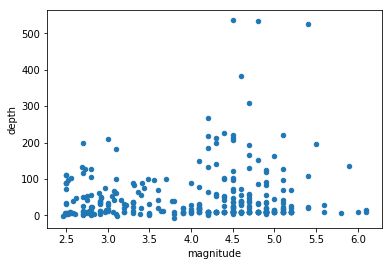

In [11]:
# plot the depth vs. magnitude

df.plot(x='magnitude', y='depth', kind='scatter')

In [12]:
# save the dataframe to disk

df.to_csv('usgs_earthquake_data.csv')

print('file saved')

file saved


In [13]:
# read it back later

new_df = pd.DataFrame.from_csv('usgs_earthquake_data.csv')

print(new_df.head())

   depth  magnitude
0  16.96       5.10
1  39.00       2.58
2  10.00       4.50
3  10.00       4.20
4   4.90       2.60


# Part 2: Querying an API endpoint

### Google Maps Geocoding API

Google has lots of APIs that let you access its services through code instead of through GUI apps. This one from Google Maps lets you look up the latitude-longitude coordinates of street addresses.

It works similarly to the earthquakes example, but with query parameters added to the URL endpoint!

**API documentation:**  
https://developers.google.com/maps/documentation/geocoding/intro

**API endpoint:**  
https://maps.googleapis.com/maps/api/geocode/json

**API endpoint with query parameters:**  
https://maps.googleapis.com/maps/api/geocode/json?address=Wurster+Hall

In [14]:
import json    # library for working with JSON-formatted text strings
import requests  # library for accessing content from web URLs

import pprint  # library for making Python data structures readable
pp = pprint.PrettyPrinter()

In [15]:
# we have to encode the search query so that it can be passed as a URL, 
# with spaces and other special characters removed

endpoint = 'https://maps.googleapis.com/maps/api/geocode/json'

params = {'address': 'young library uky'}

url = requests.Request('GET', endpoint, params=params).prepare().url
print(url)

https://maps.googleapis.com/maps/api/geocode/json?address=young+library+uky


In [16]:
# download and parse the results

response = requests.get(url)
results = response.text
data = json.loads(results)

print(data)

{'error_message': 'You have exceeded your daily request quota for this API. We recommend registering for a key at the Google Developers Console: https://console.developers.google.com/apis/credentials?project=_', 'results': [], 'status': 'OVER_QUERY_LIMIT'}


In [17]:
# if needed google_key = ''

In [18]:
# print it more nicely

pp.pprint(data)

{'error_message': 'You have exceeded your daily request quota for this API. We '
                  'recommend registering for a key at the Google Developers '
                  'Console: '
                  'https://console.developers.google.com/apis/credentials?project=_',
 'results': [],
 'status': 'OVER_QUERY_LIMIT'}


In [19]:
# pull out the lat-lon coordinates

for r in data['results']:
    coords = r['geometry']['location']
    print(coords['lat'], coords['lng'])

### Exercises

1. Search for some other addresses or landmarks!
2. Take a look at the [API documentation](https://developers.google.com/maps/documentation/geocoding/intro). What are the usage limits?

In [20]:
endpoint = 'https://maps.googleapis.com/maps/api/geocode/json'

params = {'address': '152 East Fourth St, Lexington, KY 40508'}

url = requests.Request('GET', endpoint, params=params).prepare().url
print(url)

https://maps.googleapis.com/maps/api/geocode/json?address=152+East+Fourth+St%2C+Lexington%2C+KY+40508


In [21]:
# download and parse the results

response = requests.get(url)
results = response.text
data = json.loads(results)

print(data)

{'error_message': 'You have exceeded your daily request quota for this API. We recommend registering for a key at the Google Developers Console: https://console.developers.google.com/apis/credentials?project=_', 'results': [], 'status': 'OVER_QUERY_LIMIT'}


In [22]:
pp.pprint(data)

{'error_message': 'You have exceeded your daily request quota for this API. We '
                  'recommend registering for a key at the Google Developers '
                  'Console: '
                  'https://console.developers.google.com/apis/credentials?project=_',
 'results': [],
 'status': 'OVER_QUERY_LIMIT'}


In [23]:
for r in data['results']:
    coords = r['geometry']['location']
    print(coords['lat'], coords['lng'])

In [24]:
# 2,500 free requests per day, calculated as the sum of client-side and server-side queries.
# 50 requests per second, calculated as the sum of client-side and server-side queries.

# Part 3: Querying an API with authentication

### Twitter REST APIs

Twitter's APIs also operate over the web, but they require a back-and-forth authentication process at the beginning of each connection. It's easier to have a Python library handle this than to create the query URLs ourselves.

The Twitter "REST" APIs perform stand-alone operations: you submit a query and receive results, like in earlier examples. ([REST](https://en.wikipedia.org/wiki/Representational_state_transfer) is a particular set of guidelines that many APIs follow.) Twitter also has a "streaming" API that continues sending results in real time until you disconnect.

**API documentation:**  
https://dev.twitter.com/rest/public  
https://dev.twitter.com/overview/api/tweets

**Documentation for the Python helper library**:  
https://github.com/geduldig/TwitterAPI

In [25]:
from TwitterAPI import TwitterAPI

import pprint  # library for making Python data structures readable
pp = pprint.PrettyPrinter()

In [26]:
# import API credentials from keys.py file in the
# same directory as this notebook

from keys import *

In [27]:
# set up an API connection using credentials from the keys file

api = TwitterAPI(consumer_key, consumer_secret, 
                 access_token, access_token_secret)

print("Connection is set up but not tested")

Connection is set up but not tested


### Making a simple data request

In [28]:
# most recent tweet from @UCBerkeley's timeline

endpoint = 'statuses/user_timeline'
params = {
    'screen_name': 'UKAthletics', 
    'count': 5
}
r = api.request(endpoint, params)

for tweet in r.get_iterator():
    print(tweet['text'])

RT @UKFootball: Live Now: @UKCoachStoops Spring Football Press Conference https://t.co/Nh2YQHq2Ve
RT @UKFootball: We're baaaack! Spring football starts today and @UKCoachStoops
will meet with the media at approx. 9:30 am. You can watch h…
RT @UKFootball: Football is Back in the Bluegrass. ⚪️🔵 #GetUp https://t.co/oYfZHh3vtb
#WeAreUK https://t.co/wdu5ETlAWl
RT @UKMensTennis: That's the way to start SEC play!

We beat No. 44 Alabama, 4-0!

RECAP: https://t.co/7iuJKmsTjM https://t.co/oSXkBPLc01


In [29]:
# what other data is there?

pp.pprint(tweet)

{'contributors': None,
 'coordinates': None,
 'created_at': 'Sun Mar 04 22:53:59 +0000 2018',
 'entities': {'hashtags': [],
              'media': [{'display_url': 'pic.twitter.com/oSXkBPLc01',
                         'expanded_url': 'https://twitter.com/UKMensTennis/status/970432078641811458/photo/1',
                         'id': 970430850406998017,
                         'id_str': '970430850406998017',
                         'indices': [114, 137],
                         'media_url': 'http://pbs.twimg.com/media/DXept4WW4AEjLdx.jpg',
                         'media_url_https': 'https://pbs.twimg.com/media/DXept4WW4AEjLdx.jpg',
                         'sizes': {'large': {'h': 1152,
                                             'resize': 'fit',
                                             'w': 2048},
                                   'medium': {'h': 675,
                                              'resize': 'fit',
                                              'w': 1200},
    

### Other API endpoints allow different types of searches

In [30]:
# search for public tweets about #BBN

endpoint = 'search/tweets'
params = {
    'q': '#BBN', 
    'count': 5
}
r = api.request(endpoint, params)

for tweet in r.get_iterator():
    print(tweet['text'] + '\n')

RT @wildcatnews: Kentucky moves up to No. 6 in college baseball standings. #BBN https://t.co/Kd01pOfKAg

RT @kentuckyalumni: UK Men’s Basketball Led Nation in Home Attendance Again: https://t.co/pNkFNb3MV5 #BBN

UK Men’s Basketball Led Nation in Home Attendance Again: https://t.co/pNkFNb3MV5 #BBN

Kentucky moves up to No. 6 in college baseball standings. #BBN https://t.co/Kd01pOfKAg

HERALD-LEADER: Kentucky spring football ‘pure fun?’ Mark Stoops definitely thinks so. https://t.co/3WSgEu14AB #BBN https://t.co/IbeqcBeRxn



In [31]:
# search for public tweets in Hindi

endpoint = 'search/tweets'
params = {
    'q': '*', 
    'lang': 'hi', 
    'count': 5
} 
r = api.request(endpoint, params)

for tweet in r.get_iterator():
    print(tweet['text'] + '\n')

RT @ChoudharyId: #IndraniChidambaramVideo
#स्वर्ग_VS_सतलोक 
स्वर्ग मे काम, क्रोध, मोह,लोभ,अंहकार ये पांच विकार कभी समाप्त नही होते।
जबकि सत…

RT @apnlivehindi: #DeshKiBaaT: मोदी को हराने के लिए विपक्ष में एकजुटता का प्रयास, सपा-बसपा एक साथ आने की कोशिश में, उत्तर से दक्षिण तक विप…

@LoveSRKForLyf @B4d5hah Isne copy kiya mujhe 😏

@Kanika72324700 @G4Gautam1443 @Sanya_Appy @being_angana @Mana_K_Hum_ @rohit_28692 @Woken_Soul @kingslayer112… https://t.co/JmuOHE2lm9

RT @panwarrajneesh: #महंगाई_की_मार दिल्ली में रोजमर्रा की जरुरतों के दाम आसमान छू रहे है और भाजपा की केन्द्र सरकार मंहगाई को काबू करने के…



In [32]:
# search for public tweets geotagged near the UK campus

endpoint = 'search/tweets'
params = {
    'q': '*', 
    'geocode': '38.034,-84.500,0.5km', 
    'count': 10
} 
r = api.request(endpoint, params)

for tweet in r.get_iterator():
    print(tweet['text'] + '\n')

Ladies skating into the week! This is how we do Monday at Shine Pilates - standing tall and… https://t.co/Bz4GkwkZqR

Day 129: Signs of spring! Renewal cometh. #choosehappy @ University of Kentucky Arboretum https://t.co/DetOufwbUQ

Tri Delt Sunday??? Yes. @ Delta Delta Delta Sorority https://t.co/F78fkK3uht

happy founder’s day to the sorority that came into my life at just… https://t.co/HMzMVCb9Bo

Sunday Stretch feels so good! 
#scheduleanappointment #comestretchwithus #sharethelex… https://t.co/2B4LSkQDcF

lol @ Lynagh's Irish Pub https://t.co/oTqmCNGLcX

big sports gals @ Lynagh's Irish Pub https://t.co/4bQjKxZLs5

Working out the low back kinks on a Saturday morning! Small but mighty movements, lots of… https://t.co/1FEXDaVB0F

hustle, hustle, move your bustle 💃🏼
•
•
•
HAPPY OPENING! @ Singletary Center for the Arts https://t.co/YQsVNhTpEm

*Hospital scene in Remember The Titans. 
Gary: “Alice are you blind? Don’t you see the family… https://t.co/hf6tMEKYJ2



### Exercises

1. Try some different search queries!
2. Display some more data fields in addition to the tweet text

In [33]:
# search for public tweets about #BBN

endpoint = 'search/tweets'
params = {
    'q': '#batman', 
    'count': 5
}
r = api.request(endpoint, params)

for tweet in r.get_iterator():
    print(tweet['text'] + '\n')

RT @DemiTeamTR: 🚨 TODAY IS THE LAST DAY TO VOTE! RT TO VOTE!! 

#Batman #CutestPet #iHeartAwards https://t.co/pctlTDx6En

RT @Kaylareneemed1: Only thirty minutes left to finish the vote!

A thousand answers very fast here!

#Batman #CutestPet #iHeartAwards @ddl…

RT @QbanLovatic: LAST DAY TO VOTE!!! #Batman needs to win this!! HE is truly the #CutestPet on this planet #iHeartAwards ❤❤ You know what t…

RT @hisnameismarvo: #batman 😌😜 https://t.co/jdgka4M4DF

RT @HistoftheBatman: “The X-Men animated series opening is the best ever!”

Me, an intellectual: 
#Batman #BTAS @TheAnimatedBat https://t.c…



### Bonus: Streaming live tweets in real time 

In [34]:
# Twitter limits simultaneous connections to the streaming API,
# so this part may not work using the demo API keys during class

endpoint = 'statuses/filter'
params = {'locations': '-180,-90,180,90'}
r = api.request(endpoint, params)
LIMIT = 20

# 'enumerate' lets us count tweets as we receive them

for i, tweet in enumerate(r.get_iterator()):
    print(tweet['created_at'])
    print(tweet['place']['full_name'] + ', ' + tweet['place']['country'])
    print(tweet['text'] + '\n')
    if (i > LIMIT): break

# close the streaming connection
r.close()

Mon Mar 05 17:11:36 +0000 2018
Quezon City, National Capital Region, Republic of the Philippines
Finally got a headstart with that Taiwan itinerary lol

Mon Mar 05 17:11:36 +0000 2018
Ikeja, Nigeria, Nigeria
Falz is truly unique.

Mon Mar 05 17:11:36 +0000 2018
Murcia, España, España
@BelnMoral @OT_Oficial Pues tu haz lo que quieras.

Mon Mar 05 17:11:36 +0000 2018
Auckland, New Zealand, New Zealand
@standupwi Step 1. Remove your children from state schools.

Mon Mar 05 17:11:36 +0000 2018
Iowa, USA, United States
Anybody wanna go to skizzy mars or gambino???

Mon Mar 05 17:11:36 +0000 2018
Cuiabá, Brasil, Brasil
Minha cabeça vai estourar de dor AAAAA

Mon Mar 05 17:11:36 +0000 2018
Myanmar, Myanmar
Bibadi babadi boo ✨Make Kyung Soo's hair grew✨#EXOL #BestFanArmy #iHeartAwards @weareoneEXO https://t.co/v6Df1XfOWx

Mon Mar 05 17:11:36 +0000 2018
Trelleborg, Sverige, Sverige
badminton is so boring we had it in school today made me want to kms

Mon Mar 05 17:11:36 +0000 2018
Mitchell's Pl

### Exercises for the remainder of class

1. Make a scatter plot of the lat-lon coordinates of earthquakes.  
   &nbsp;
   
2. Using the geocoding example as a starting point, try searching the Google Maps Directions API or Elevation API instead. Descriptions are in the [API documentation](https://developers.google.com/maps/documentation/geocoding/intro).  
   &nbsp;
   

In [37]:

endpoint_url = "http://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/2.5_week.geojson"
response = requests.get(endpoint_url)
results = response.text

# what is the data type of the results?
print(type(results))

SyntaxError: invalid syntax (<ipython-input-37-5ad444935863>, line 1)

### For next time...

In the next class, you will try out another API that provides data you're interested in. You will be asked to try connecting to it using Python code, and performing some basic operations on the data.  To come prepared for next time, please explore some of the transportation-related APIs that may be valuable, and choose one that is of interest to you.

Here are a a few to get you started. 

Public Transit
https://www.programmableweb.com/news/how-smart-cities-are-using-apis-public-transport-apis/2014/05/22

Long-Distance Travel
http://www.olery.com/blog/the-best-travel-apis-discover-contribute/ 

Transportation
https://www.programmableweb.com/category/transportation/api


Start by reading the public transit page, because that provides a nice overview of the types of applications out there, and some of the issues in using them.  These lessons often apply to traffic and transportation more generally.  

Keep in mind that there are a number of different organizations that provide APIs, with different motivations and quality of what is provided.  If it is a private company, what is their business model?  What is the underlying source of the data, and what might that imply about how representative it is of the real world?  There is a ton of stuff out there.  How do we go about sorting out what is useful to us and what is now.  Spend some time exploring these and thinking about these questions.  


In [ ]:
# accessKey: 825eafcfb72151832260c9e8463c7733
# secretKey: d6cf5380070ae236d8277b8f10817d86

In [3]:
from requests.auth import HTTPBasicAuth
requests.get('https://gtfsapi.metrarail.com', auth=HTTPBasicAuth('825eafcfb72151832260c9e8463c7733', 'd6cf5380070ae236d8277b8f10817d86'))

NameError: name 'requests' is not defined

In [35]:
endpoint_url = 'https://gtfsapi.metrarail.com/gtfs/tripUpdates'
response = requests.get(endpoint_url)
results = response.text
data = json.loads(results)

JSONDecodeError: Expecting value: line 1 column 1 (char 0)